# Datajoint demo (lightsheet)

In [1]:
import pylab as pl
import datajoint as dj
import numpy as np
import os
assert dj.__version__=='0.12.dev3'

# Connect to the database

In [2]:
schema = dj.create_virtual_module('ahoag_lightsheet_demo','ahoag_lightsheet_demo')

Please enter DataJoint username: ahoag
Please enter DataJoint password: ········
Connecting ahoag@localhost:3306


## Visualize the tables in the database

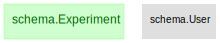

In [3]:
dj.ERD(schema)

In [4]:
schema_pnisubject = dj.create_virtual_module('pni_subject','pni_subject')

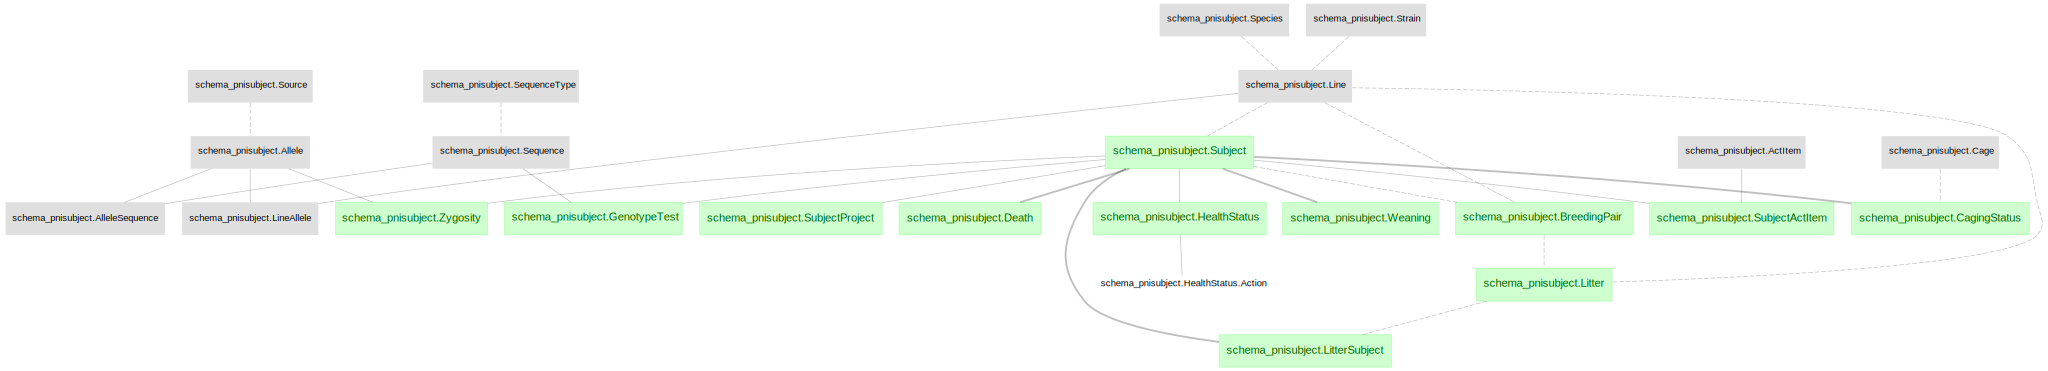

In [5]:
dj.ERD(schema_pnisubject)

In [9]:
schema.Experiment() #Shows the current content of the database

experiment_id allowed here are sql datatypes.,username,title,description,species,clearing_protocol,fluorophores,primary_antibody,secondary_antibody,image_resolution,cell_detection,registration,probe_detection,injection_detection
1,ahoag,20190507_Wanglab_exp,Image c-fos in whole brains at 1.3x.,mouse,iDISCO+,None,Anti cfos 1:1000,Donkey antirabbit AF647,1.3x,1,0,0,0
2,ahoag,20190304_LW_m340,Detect placement of optical fiber tip,mouse,iDISCO abbreviated clearing,GCampxDat-Cre Double Transgentic Mouse,None,None,1.3x,0,0,1,0
3,ahoag,201905_atlas00x where x=1:n,"Brody lab rat atlas, iDisco + 1.3x",rat,iDISCO abbreviated clearing,None,None,None,1.3x,0,0,0,0
4,ahoag,an1-31,Recover mcherry expression in cerebellum. Morphology analysis.,mouse,iDISCO+,mcherry,rabbit anti-RFP 1:1000,Donkey antiRabbit 647 1:450,1.3x,0,0,0,1


## Query the tables

In [11]:
schema.Experiment() & 'experiment_id >2'

experiment_id allowed here are sql datatypes.,username,title,description,species,clearing_protocol,fluorophores,primary_antibody,secondary_antibody,image_resolution,cell_detection,registration,probe_detection,injection_detection
3,ahoag,201905_atlas00x where x=1:n,"Brody lab rat atlas, iDisco + 1.3x",rat,iDISCO abbreviated clearing,None,None,None,1.3x,0,0,0,0
4,ahoag,an1-31,Recover mcherry expression in cerebellum. Morphology analysis.,mouse,iDISCO+,mcherry,rabbit anti-RFP 1:1000,Donkey antiRabbit 647 1:450,1.3x,0,0,0,1


In [15]:
schema.Experiment() & 'species = "rat" '

experiment_id allowed here are sql datatypes.,username,title,description,species,clearing_protocol,fluorophores,primary_antibody,secondary_antibody,image_resolution,cell_detection,registration,probe_detection,injection_detection
3,ahoag,201905_atlas00x where x=1:n,"Brody lab rat atlas, iDisco + 1.3x",rat,iDISCO abbreviated clearing,None,None,None,1.3x,0,0,0,0


## 2) Generate content for the database

In [59]:
home_dir = os.environ['HOME']
dj_dir = home_dir + '/Documents/Datajoint/'
csv_file = dj_dir + '/pni_core_facility_request_responses.txt'
import csv

In [60]:
def fill_user_table():
    with open(csv_file, mode='r') as infile:
        reader = csv.reader(infile)
        data_dict = {}
        next(reader) # skips the header
        index = 0
        for row in reader:
            email = row[0]
            username = email.split('@')[0].lower()
            insert_user_list = [username,email]
#             print(insert_user_list)
            User().insert((insert_user_list,),skip_duplicates = True)
            index+=1

column_names = ['username','title','description','species','clearing_protocol',
                'fluorophores','primary_antibody','secondary_antibody',
                'image_resolution','cell_detection','registration',
                'probe_detection','injection_detection']
def fill_exp_table():
    with open(csv_file, mode='r') as infile:
        reader = csv.reader(infile)
        data_dict = {}
        next(reader) # skips the header
    #     rows_2insert = [row[0]]
        index = 0
        for row in reader:
            email = row[0]
            username = email.split('@')[0].lower()
#             insert_exp_list = [username,index] + row[2:]  
            insert_exp_list = [username] + row[2:]
            insert_dict = {column_names[ii]:insert_exp_list[ii] for ii in range(len(column_names))}
            Experiment().insert1(insert_dict,skip_duplicates=True)
            index+=1
    #     response_dict = {rows[0]:rows[1] for rows in reader}
    # print(keys)

In [61]:
fill_user_table()

In [62]:
User()

username user in the lab,email
ahoag,ahoag@princeton.edu


In [63]:
fill_exp_table()

In [65]:
Experiment()

experiment_id allowed here are sql datatypes.,username,title,description,species,clearing_protocol,fluorophores,primary_antibody,secondary_antibody,image_resolution,cell_detection,registration,probe_detection,injection_detection
1,ahoag,20190507_Wanglab_exp,Image c-fos in whole brains at 1.3x.,mouse,iDISCO+,None,Anti cfos 1:1000,Donkey antirabbit AF647,1.3x,1,0,0,0
2,ahoag,20190304_LW_m340,Detect placement of optical fiber tip,mouse,iDISCO abbreviated clearing,GCampxDat-Cre Double Transgentic Mouse,None,None,1.3x,0,0,1,0
3,ahoag,201905_atlas00x where x=1:n,"Brody lab rat atlas, iDisco + 1.3x",rat,iDISCO abbreviated clearing,None,None,None,1.3x,0,0,0,0
4,ahoag,an1-31,Recover mcherry expression in cerebellum. Morphology analysis.,mouse,iDISCO+,mcherry,rabbit anti-RFP 1:1000,Donkey antiRabbit 647 1:450,1.3x,0,0,0,1
5,ahoag,Test experiment,A new test experiment,primate,uDISCO,None at all,A very expensive new antibody,,1.3x,1,0,1,0


In [72]:
Experiment().fetch("KEY")[-1]['experiment_id']

5